<IPython.core.display.Javascript object>


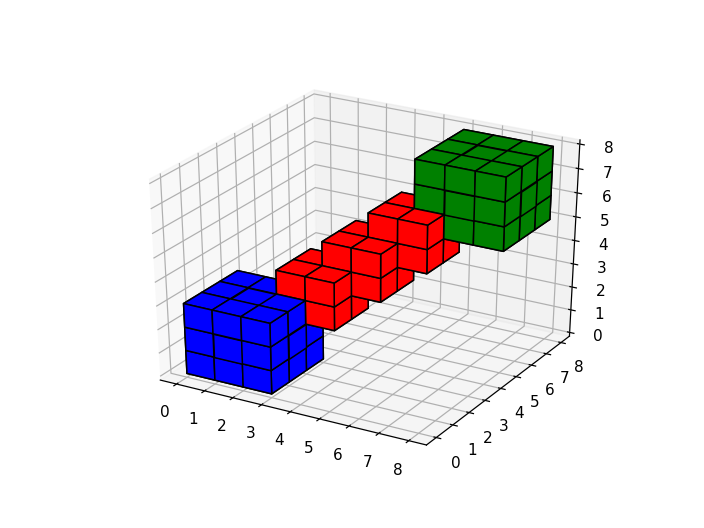

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook


# prepare some coordinates
x, y, z = np.indices((8, 8, 8))

# draw cuboids in the top left and bottom right corners, and a link between
# them
cube1 = (x < 3) & (y < 3) & (z < 3)
cube2 = (x >= 5) & (y >= 5) & (z >= 5)
link = abs(x - y) + abs(y - z) + abs(z - x) <= 2

# combine the objects into a single boolean array
voxels = cube1 | cube2 | link

# set the colors of each object
colors = np.empty(voxels.shape, dtype=object)
colors[link] = 'red'
colors[cube1] = 'blue'
colors[cube2] = 'green'

# and plot everything
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.voxels(voxels, facecolors=colors, edgecolor='k')

plt.show()

In [10]:
class Environment:
    def __init__(self, width=10, height=10):
        self.voxels = np.zeros((width, width, height), dtype=bool)
        self.cubes = np.zeros((width, width, height), dtype=bool)
        self.motors = np.zeros((width, width, height), dtype=bool)
        self.x, self.y, self.z = np.indices(self.voxels.shape)
        self.colors = np.empty(self.voxels.shape, dtype=object)
    
    def show(self, ax):
        ax.voxels(self.voxels, facecolors=self.colors, edgecolor='k')
    
    def add_node(self, coords, type="cube"):
        self.voxels = self.voxels | ((self.x == coords[0]) & (self.y == coords[1]) & (self.z == coords[2]))
        self.colors[coords] = 'blue' if type == "cube" else 'red'

<IPython.core.display.Javascript object>


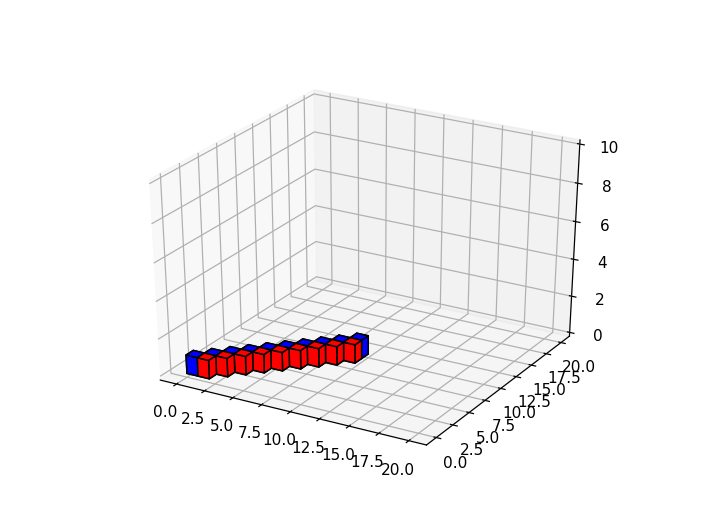

In [13]:
env = Environment(20)
for x in range(10):
    env.add_node((x, x, 0))
for x in range(10):
    env.add_node((x, x-1, 0), type="motor")
fig = plt.figure()
ax = fig.gca(projection='3d')
env.show(ax)